<a href="https://colab.research.google.com/github/AFariaJr/covid-vis/blob/main/webscraping_CLDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID Dataset organization 

#Function to get and extract csv database from Brasil.io

In [1]:
#Function to get and extract csv database from Brasil.io
def get_database():
    import pandas as pd
    import os
    !wget -P '/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/' https://data.brasil.io/dataset/covid19/caso_full.csv.gz
    file = '/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/caso_full.csv.gz'
    return pd.read_csv(file, compression='gzip')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#call function from the cell above
file = get_database()
file.head()

--2021-06-08 14:28:08--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 104.26.9.175, 172.67.71.45, 104.26.8.175, ...
Connecting to data.brasil.io (data.brasil.io)|104.26.9.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53279536 (51M) [application/gzip]
Saving to: ‘/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/caso_full.csv.gz’

caso_full.csv.gz    100%[===================>]  50.81M  10.5MB/s    in 5.0s    

2021-06-08 14:28:13 (10.1 MB/s) - ‘/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/caso_full.csv.gz’ saved [53279536/53279536]



,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [3]:
file.columns.values

array(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants',
       'last_available_date', 'last_available_death_rate',
       'last_available_deaths', 'order_for_place', 'place_type', 'state',
       'new_confirmed', 'new_deaths'], dtype=object)

In [4]:
colunas = ['city', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants',
       'last_available_date', 'last_available_death_rate',
       'last_available_deaths', 'place_type', 'state',
       'new_confirmed', 'new_deaths']

In [5]:
#selecting working columns from original data
selected = file.filter(items=colunas)
# selected.reset_index()
selected['date'] = pd.to_datetime(selected['date'])
selected.head()



,city,date,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,Rio Branco,2020-03-17,202012,413418.0,407319.0,3,0.72566,2020-03-17,0.0,0,city,AC,3,0
1,NaN,2020-03-17,202012,894470.0,881935.0,3,0.33539,2020-03-17,0.0,0,state,AC,3,0
2,Rio Branco,2020-03-18,202012,413418.0,407319.0,3,0.72566,2020-03-18,0.0,0,city,AC,0,0
3,NaN,2020-03-18,202012,894470.0,881935.0,3,0.33539,2020-03-18,0.0,0,state,AC,0,0
4,Rio Branco,2020-03-19,202012,413418.0,407319.0,4,0.96754,2020-03-19,0.0,0,city,AC,1,0


In [6]:
#checking data from Distrito Federal
selected[selected['state'].str.contains('DF')].count()

city                                              897
date                                             1355
epidemiological_week                             1355
estimated_population                              916
estimated_population_2019                         916
last_available_confirmed                         1355
last_available_confirmed_per_100k_inhabitants     916
last_available_date                              1355
last_available_death_rate                        1355
last_available_deaths                            1355
place_type                                       1355
state                                            1355
new_confirmed                                    1355
new_deaths                                       1355
dtype: int64

In [7]:
# need to improve the code and automate the processes below

#subseting for each city of interest
#DF
# reset_index to start all from index 0
df_dataset = selected[selected['city'] == 'Brasília'].reset_index(drop=True)
df_new_deaths = df_dataset['new_deaths'].reset_index(drop=True)
df_cumulative = df_new_deaths.cumsum()
df_dataset['cumulative'] = df_cumulative
df_dataset['case_cumulative'] = df_dataset['new_confirmed'].cumsum().reset_index(drop=True)

#RJ
rj_dataset = selected[selected['city'] == 'Rio de Janeiro'].reset_index(drop=True)
rj_new_deaths = rj_dataset['new_deaths'].reset_index(drop=True)
rj_cumulative = rj_new_deaths.cumsum()
rj_dataset['cumulative'] = rj_cumulative

#SP
sp_dataset = selected[selected['city'] == 'São Paulo'].reset_index(drop=True)
sp_new_deaths = sp_dataset['new_deaths'].reset_index(drop=True)
sp_cumulative = sp_new_deaths.cumsum()
sp_dataset['cumulative'] = sp_cumulative

#Moving average 14 days

In [31]:
# 14 days moving average DF
tmp_dataframe = list(df_dataset['new_deaths'])
media_movel_df = []
index = 0
for i in tmp_dataframe:
    media_movel_df.append(sum(tmp_dataframe[index-14:index])/14)
    index +=1
df_dataset['mov_average'] = media_movel_df



# # 14 days moving average DF - forecasting
# tmp_dataframe = list(df_dataset['new_deaths'])
# media_movel_df = []
# index = 0
# for i in tmp_dataframe:
#     media_movel_df.append(sum(tmp_dataframe[index:index+14])/14)
#     index +=1
# df_dataset['mov_average'] = media_movel_df


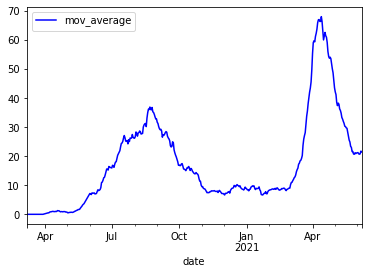

In [32]:
df_dataset.plot(kind='line', x='date', y='mov_average', color='blue')
plt.show()

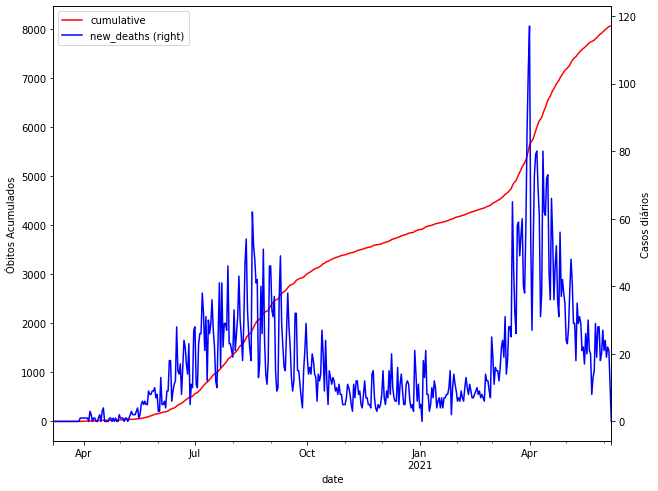

In [12]:
ax = plt.gca()
df_dataset.plot(kind='line', x='date', y='cumulative', color='red', ax=ax, figsize=(10,8),
                xlabel='Data', ylabel='Óbitos Acumulados')
df_dataset.plot(kind='line', x='date', y='new_deaths', color='blue', ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('Casos diários')
plt.show()

In [38]:
# OUTPUT EXTERNAL FILE
#these lines below use bokeh "for pandas". 
# !pip install pandas_bokeh
import pandas_bokeh
from bokeh.plotting import figure, show, output_file
# pandas_bokeh.output_notebook()
# pandas_bokeh.output_file('/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/index.html')

html_plot1 = df_dataset.plot_bokeh(
    kind='line',
    color='blue',
    x='date',
    y='new_confirmed',
    xlabel='Data',
    xlim=("2020-03-01", "2021-06-01"),
    ylim=(0,3100),
    vertical_xlabel=True,
    ylabel='Casos Diários',
    title='Casos Diários',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    show_figure=True,
    return_html=True,
    rangetool=True,
    zooming=False)

html_plot2 = df_dataset.plot_bokeh(
    kind='line',
    color='orange',
    x='date',
    y='case_cumulative',
    xlabel='Data',
    disable_scientific_axes="y",
    xlim=("2020-03-01", "2021-06-01"),
    vertical_xlabel=True,
    ylabel='Casos Acumulados',
    title='Casos Acumulados',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    show_figure=True,
    return_html=True)

html_plot3 = df_dataset.plot_bokeh(
    kind='line',
    color='green',
    x='date',
    y='new_deaths',
    xlabel='Data',
    xlim=("2020-03-01", "2021-06-01"),
    vertical_xlabel=True,
    ylabel='Óbitos Diários',
    title='Óbitos Diários',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    show_figure=True,
    return_html=True,
    zooming=False,
    ylim=(0,80),
    rangetool=True)


html_plot4 = df_dataset.plot_bokeh(
    kind='line',
    color='red',
    x='date',
    y='cumulative',
    xlabel='Data',
    xlim=("2020-03-01", "2021-06-01"),
    vertical_xlabel=True,
    ylabel='Óbitos Acumulados',
    title='Óbitos Acumulados',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    show_figure=True,
    return_html=True)

html_plot5 = df_dataset.plot_bokeh(
    kind='line',
    color='purple',
    x='date',
    y='mov_average',
    xlabel='Data',
    xlim=("2020-03-01", "2021-06-01"),
    vertical_xlabel=True,
    ylabel='Média móvel',
    title='Média Móvel 14 dias - Óbitos',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    show_figure=True,
    return_html=True)

html = html_plot1 + html_plot2 + html_plot3 + html_plot4 + html_plot5

with open('/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/index.html' , "w") as f:
    f.write(html)
    
import webbrowser
webbrowser.open('/content/drive/MyDrive/Colab Notebooks/CLDF/COVID/index.html')


False

In [34]:
# !pip install pandas_bokeh
import pandas_bokeh
from bokeh.plotting import figure, show, output_file

pandas_bokeh.output_notebook()

df_dataset.plot_bokeh(
    kind='line',
    color='blue',
    x='date',
    y='new_confirmed',
    xlabel='Data',
    xlim=("2020-02-01", "2021-06-01"),
    vertical_xlabel=True,
    ylabel='Casos Diários',
    ylim=(0,3200),
    title='Casos Diários',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    zooming=False,
    rangetool=True)

df_dataset.plot_bokeh(
    kind='line',
    color='blue',
    x='date',
    y='mov_average',
    xlabel='Data',
    xlim=("2020-02-01", "2021-05-15"),
    vertical_xlabel=True,
    ylabel='Média Móvel 14 dias',
    ylim=(0,80),
    title='Média Móvel 14 dias',
    legend='top_left',
    figsize=(600,600),
    toolbar_location='above',
    rangetool=True,
    zooming=False)

Column(id='8632', ...)